# Run
- baixar o dataset

{"username":"felipeokokama","key":"2a52a3416261297b90d33c3efcae29d2"}



#Instalando dependências

In [ ]:
!pip install opendatasets


#Importando o dataset

In [ ]:
import opendatasets as od
import pandas

# Download dataset no Colab
od.download("https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: felipeokokama
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023


100%|██████████| 25.4k/25.4k [00:00<00:00, 27.8MB/s]

In [ ]:
import pandas as pds

file =('data-science-salaries-2023/ds_salaries.csv')
df_raw = pds.read_csv(file)

# Display csv
df_raw

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


#Tratamento de dados


In [ ]:
df = df_raw.copy()

In [ ]:
print(df.dtypes)

print(df.info())


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 no

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

# Remover duplicatas
df.drop_duplicates(inplace=True)

# Remover a coluna salary (manter apenas salary_in_usd como target)
df.drop("salary", axis=1, inplace=True)

# Verificar resultado
print(df.info())


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary_currency     2584 non-null   object
 5   salary_in_usd       2584 non-null   int64 
 6   employee_residence  2584 non-null   object
 7   remote_ratio        2584 non-null   int64 
 8   company_location    2584 non-null   object
 9   company_size        2584 non-null   object
dtypes: int64(3), object(7)
memory usage: 222

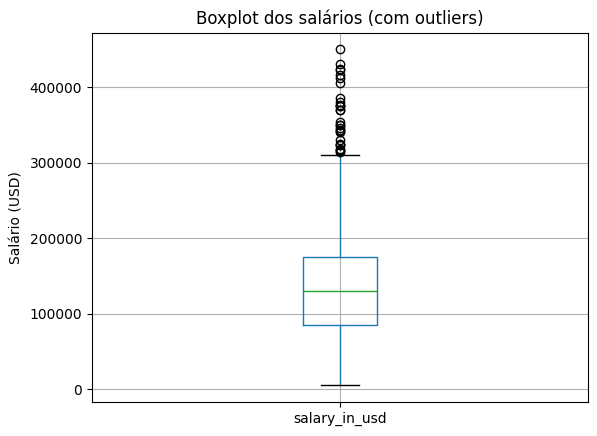

Após 1ª iteração: 2584 → 2555 registros
Após 2ª iteração: 2555 → 2551 registros


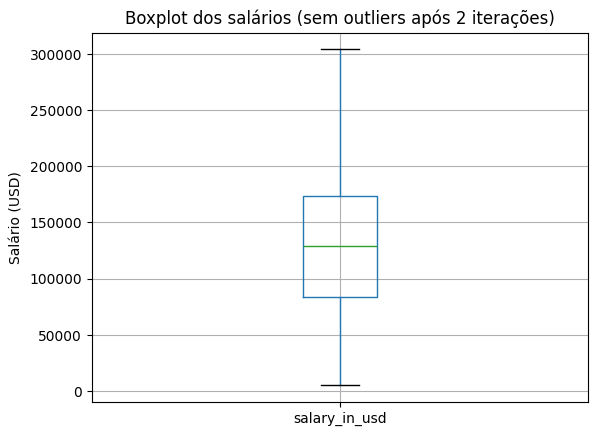

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# REMOVENDO OUTLIERS EM DUAS INTERAÇÕES

# Boxplot inicial
df.boxplot(column='salary_in_usd')
plt.title('Boxplot dos salários (com outliers)')
plt.ylabel('Salário (USD)')
plt.show()

# Iteração 1
q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

df_sem_outliers = df[(df['salary_in_usd'] >= limite_inferior) & (df['salary_in_usd'] <= limite_superior)].copy()

print(f"Após 1ª iteração: {len(df)} → {len(df_sem_outliers)} registros")

# Iteração 2
q1_2 = df_sem_outliers['salary_in_usd'].quantile(0.25)
q3_2 = df_sem_outliers['salary_in_usd'].quantile(0.75)
iqr_2 = q3_2 - q1_2

limite_inferior_2 = q1_2 - 1.5 * iqr_2
limite_superior_2 = q3_2 + 1.5 * iqr_2

df_sem_outliers_final = df_sem_outliers[
    (df_sem_outliers['salary_in_usd'] >= limite_inferior_2) &
    (df_sem_outliers['salary_in_usd'] <= limite_superior_2)
].copy()

print(f"Após 2ª iteração: {len(df_sem_outliers)} → {len(df_sem_outliers_final)} registros")

# Boxplot final
df_sem_outliers_final.boxplot(column='salary_in_usd')
plt.title('Boxplot dos salários (sem outliers após 2 iterações)')
plt.ylabel('Salário (USD)')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# TRANSFORMAR salary_in_usd PARA UMA DISTRIBUIÇÂO MENOS SENSÌVEL A VALORES DISCREPANTES
# TRANFORMANDO COLUNAS PARA NUMÉRICOS
# TRATANDO OS MÚLTIPLOS job_title CRIANDO UMA CATEGORIA others para job_title RAROS
# APLICANDO ONE HOT ENCODING EM COLUNAS CATEGÓRICAS NOMINAIS



# Criar uma cópia do dataset sem outliers
df_final = df_sem_outliers_final.copy()



# TRANSFORMAR salary_in_usd PARA UMA DISTRIBUIÇÂO MENOS SENSÌVEL A VALORES DISCREPANTES
df_final['salary_in_usd'] = np.log1p(df_final['salary_in_usd'])

# Aplicar StandardScaler
scaler = StandardScaler()
df_final['salary_in_usd'] = scaler.fit_transform(df_final[['salary_in_usd']])  # 2D array necessário



# TRANFORMANDO COLUNAS PARA NUMÉRICOS
df_final['experience_level'] = df_final['experience_level'].map({
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4
})

df_final['company_size'] = df_final['company_size'].map({
    'S': 1,
    'M': 2,
    'L': 3
})




# TRATANDO OS MÚLTIPLOS job_title CRIANDO UMA CATEGORIA others para job_title RAROS
unique_job_titles = df_final['job_title'].unique()
# print(f"Total unique job titles: {len(unique_job_titles)}")

# job_title com menos de 28 aparições serão considerados Other
min_percent = 0.01  # jobs com menos de 1% das linhas serão Other
min_occurrences = int(min_percent * len(df_final))

# Contar quantas vezes cada job_title aparece
counts = df_final['job_title'].value_counts()

# Função para agrupar jobs raros
def group_jobs(job):
    if counts[job] < min_occurrences:
        return 'Other'
    else:
        return job

# Aplicar função na coluna inteira
df_final['job_title'] = df_final['job_title'].apply(group_jobs)

# Verificar resultado
#print(df_final['job_title'].value_counts())





# APLICANDO ONE HOT ENCODING EM COLUNAS CATEGÓRICAS NOMINAIS
categorical_cols = ['job_title', 'salary_currency', 'employee_residence', 'company_location', 'employment_type']

# Aplicar One-Hot Encoding
df_final = pd.get_dummies(df_final, columns=categorical_cols, prefix=categorical_cols)

print(df_final.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2551 entries, 0 to 3754
Columns: 190 entries, work_year to employment_type_PT
dtypes: bool(185), float64(1), int64(4)
memory usage: 580.5 KB
None


## Atributos que foram modificados/tratados:

**experience_level**  
- Originalmente categórico (`EN`, `MI`, `SE`, `EX`) convertido para inteiro:  
  - `EN = 1, MI = 2, SE = 3, EX = 4`

**company_size**  
- Originalmente categórico (`S`, `M`, `L`) convertido para inteiro:  
  - `S = 1, M = 2, L = 3`


**employment_type**  
- Originalmente categórico (`FT`, `CT`, `PT`, `FL`)  
- Aplicado **One-Hot Encoding**, gerando novas colunas booleanas:  
  - `emp_type_FT`, `emp_type_CT`, `emp_type_PT`, `emp_type_FL`


**salary_in_usd**
- Ajustes em valores discrepantes


**job_title**  
- Aplicado o esquema para diminuir a quantidade de job_title raros
- Aplicado **One-Hot Encoding**, gerando novas colunas booleanas


**employee_residence**
- Aplicado **One-Hot Encoding**, gerando novas colunas booleanas


**company_location**
- Aplicado **One-Hot Encoding**, gerando novas colunas booleanas


- **salary_currency**
- Aplicado **One-Hot Encoding**, gerando novas colunas booleanas


---

## Atributos que ainda não foram tratados ou convertidos:

- **work_year** inteiro, já está pronto   
- **remote_ratio** numérico, pronto  


# Heatmap

In [ ]:
import pandas as pd
import plotly.express as px

# HEATMAP DA RELAÇÂO ENTRE salary_in_usd E AS OUTRAS COLUNAS (COM CORRELAÇÃO MAIOR QUE 0.1)

colunas_num = df_final.select_dtypes(include=["int64", "float64", "bool"]).copy()
colunas_num = colunas_num.astype(int)  # bool -> int

# Gerar matriz de correlação
corr = colunas_num.corr()

# Selecionar features mais correlacionadas com salary_in_usd
threshold = 0.1  # exibe apenas correlação maior que 0.1 ou menor que -0.1
top_features = corr['salary_in_usd'][abs(corr['salary_in_usd']) > threshold].sort_values(ascending=False).index

# Criar heatmap apenas com essas features
fig = px.imshow(
    corr.loc[top_features, top_features],
    text_auto=True,
    color_continuous_scale="RdBu_r",
    title="Heatmap de features mais correlacionadas com salary_in_usd"
)
fig.show()


# Aplicando algoritmos de Regressão e Plotando os resíduos

In [ ]:
# SEPARAR COLUNAS X E Y

# Selecionar apenas colunas numéricas e booleanas
X = df_final.select_dtypes(include=["int64", "float64", "bool"]).copy()

# Remover a coluna alvo 'salary_in_usd' do conjunto de features
X = X.drop(columns=['salary_in_usd'])

# Definir y como a variável alvo
y = df_final['salary_in_usd']

# Verificar as features selecionadas
print(X.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2551 entries, 0 to 3754
Columns: 189 entries, work_year to employment_type_PT
dtypes: bool(185), int64(4)
memory usage: 560.5 KB
None


Ridge R² médio: 0.5542769760642197
Ridge MSE médio: 0.40154800967730075
Lasso R² médio: 0.5160342751982971
Lasso MSE médio: 0.43913792829380205


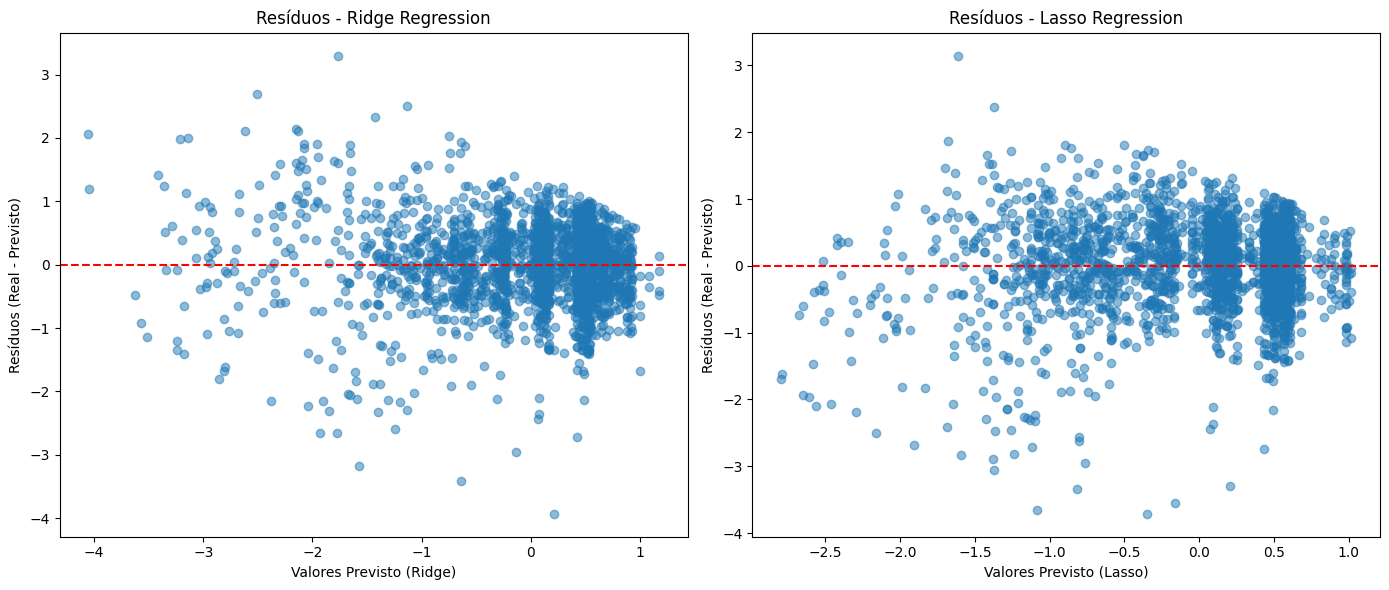

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error


# TREINAR MODELOS RIDGE E LASSO COM CROSS-VALIDATION
# CALCULAR MÉTRICAS R² E MSE
# CALCULAR RESÍDUOS (REAL - PREVISTO)
# PLOTAR GRÁFICO DE RESÍDUOS PARA VISUALIZAR ERROS



# Ridge
ridge = Ridge(alpha=1.0)

# Previsões usando cross-validation
y_pred_ridge = cross_val_predict(ridge, X, y, cv=5)

# R² e MSE
r2_ridge = np.mean(cross_val_score(ridge, X, y, cv=5, scoring='r2'))
mse_ridge = mean_squared_error(y, y_pred_ridge)

print("Ridge R² médio:", r2_ridge)
print("Ridge MSE médio:", mse_ridge)

# Resíduos
residuos_ridge = y - y_pred_ridge



# Lasso
lasso = Lasso(alpha=0.01)

# Previsões usando cross-validation
y_pred_lasso = cross_val_predict(lasso, X, y, cv=5)

# R² e MSE
r2_lasso = np.mean(cross_val_score(lasso, X, y, cv=5, scoring='r2'))
mse_lasso = mean_squared_error(y, y_pred_lasso)

print("Lasso R² médio:", r2_lasso)
print("Lasso MSE médio:", mse_lasso)

# Resíduos
residuos_lasso = y - y_pred_lasso

# Plot dos resíduos
plt.figure(figsize=(14,6))



# Ridge
plt.subplot(1,2,1)
plt.scatter(y_pred_ridge, residuos_ridge, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Previsto (Ridge)")
plt.ylabel("Resíduos (Real - Previsto)")
plt.title("Resíduos - Ridge Regression")

# Lasso
plt.subplot(1,2,2)
plt.scatter(y_pred_lasso, residuos_lasso, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Previsto (Lasso)")
plt.ylabel("Resíduos (Real - Previsto)")
plt.title("Resíduos - Lasso Regression")

plt.tight_layout()
plt.show()


Polynomial Regression (degree=2) R² médio: 0.06400920827960255
Polynomial Regression (degree=2) MSE médio: 0.9557113937659784


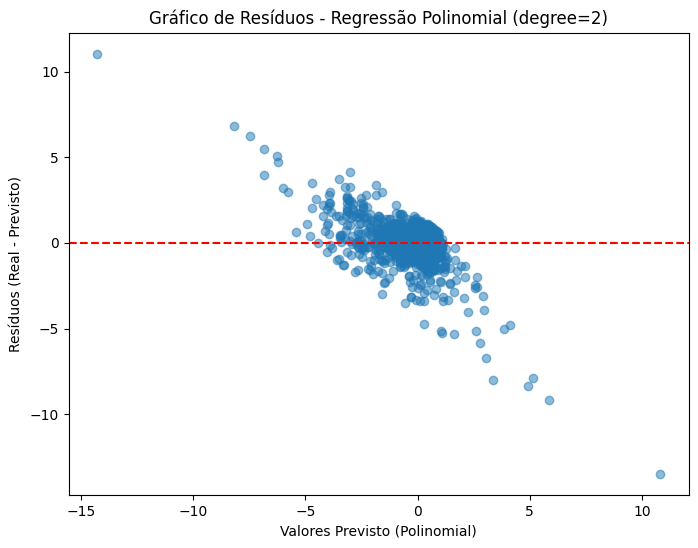

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error


# APLICAR TRANSFORMAÇÃO POLINOMIAL NAS FEATURES
# TREINAR MODELO RIDGE POLINOMIAL COM CROSS-VALIDATION
# CALCULAR MÉTRICAS R² E MSE
# CALCULAR RESÍDUOS (REAL - PREVISTO)
# PLOTAR GRÁFICO DE RESÍDUOS PARA VISUALIZAR ERROS


# Transformação polinomial
degree = 2  # grau do polinômio, pode testar 2 ou 3
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Modelo Ridge
ridge_poly = Ridge(alpha=1.0)

# Previsões usando cross-validation
y_pred_poly = cross_val_predict(ridge_poly, X_poly, y, cv=5)

# Métricas
r2_poly = np.mean(cross_val_score(ridge_poly, X_poly, y, cv=5, scoring='r2'))
mse_poly = mean_squared_error(y, y_pred_poly)

print(f"Polynomial Regression (degree={degree}) R² médio:", r2_poly)
print(f"Polynomial Regression (degree={degree}) MSE médio:", mse_poly)

# Gráfico de resíduos
residuos_poly = y - y_pred_poly

plt.figure(figsize=(8,6))
plt.scatter(y_pred_poly, residuos_poly, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Previsto (Polinomial)")
plt.ylabel("Resíduos (Real - Previsto)")
plt.title(f"Gráfico de Resíduos - Regressão Polinomial (degree={degree})")
plt.show()


A regressão polinomial teve R² baixo porque força uma relação quadrática simples entre as variáveis, enquanto os dados apresentam padrões mais complexos que não seguem esse formato. Isso gera underfitting e alto erro.

Random Forest R² médio: 0.4920445718507155
Random Forest MSE médio: 0.4591732464948077


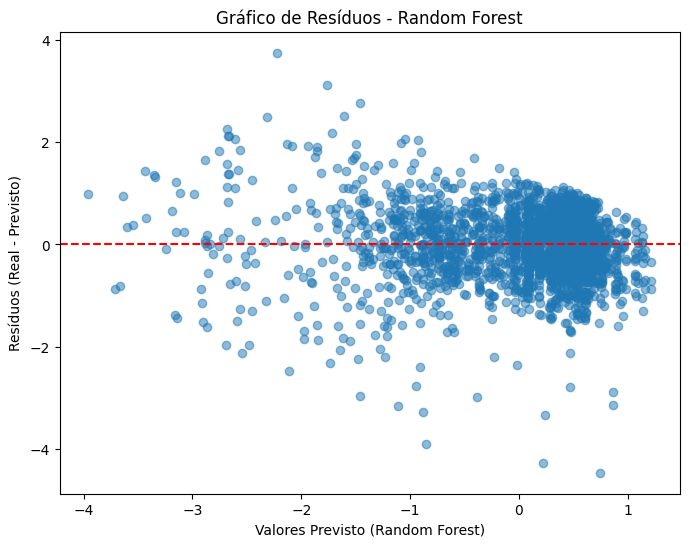

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error


# CONFIGURAR MODELO RANDOM FOREST REGRESSOR
# TREINAR MODELO USANDO CROSS-VALIDATION
# CALCULAR MÉTRICAS R² E MSE
# CALCULAR RESÍDUOS (REAL - PREVISTO)
# PLOTAR GRÁFICO DE RESÍDUOS PARA VISUALIZAR ERROS


# Configurar o modelo
rf = RandomForestRegressor(n_estimators=200, random_state=42)  # 200 árvores

# Cross-validation
y_pred = cross_val_predict(rf, X, y, cv=5)  # 5-fold CV
r2 = np.mean(cross_val_score(rf, X, y, cv=5, scoring='r2'))
mse = mean_squared_error(y, y_pred)

print("Random Forest R² médio:", r2)
print("Random Forest MSE médio:", mse)

# Gráfico de resíduos
residuos = y - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Previsto (Random Forest)")
plt.ylabel("Resíduos (Real - Previsto)")
plt.title("Gráfico de Resíduos - Random Forest")
plt.show()


Melhores hiperparâmetros encontrados:
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': 10}
Melhor R² médio via CV: 0.5429119231061172
R² médio (cross-val predict): 0.586
MSE médio (cross-val predict): 0.414


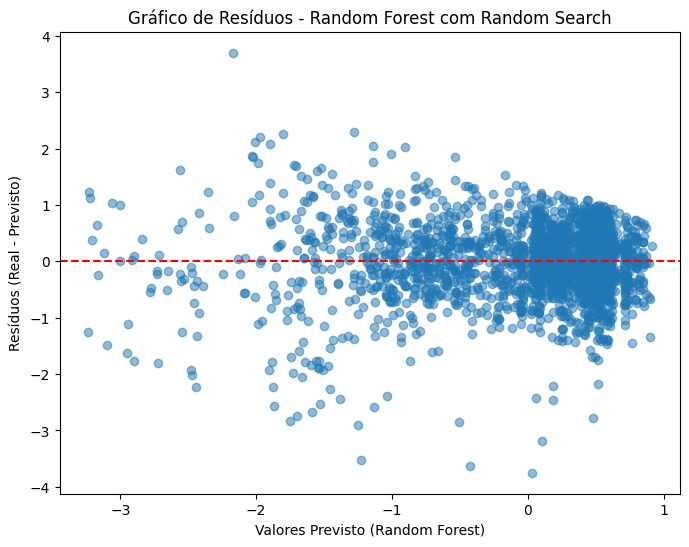

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score


# CONFIGURAR MODELO RANDOM FOREST
# DEFINIR GRID DE HIPERPARÂMETROS PARA RANDOM SEARCH
# EXECUTAR RANDOMIZEDSEARCHCV COM CROSS-VALIDATION
# IMPRIMIR MELHORES HIPERPARÂMETROS E MELHOR R² MÉDIO VIA CV
# FAZER PREVISÕES COM CROSS_VAL_PREDICT USANDO O MELHOR MODELO
# CALCULAR MÉTRICAS R² E MSE
# CALCULAR RESÍDUOS (REAL - PREVISTO)
# PLOTAR GRÁFICO DE RESÍDUOS PARA VISUALIZAR ERROS


# Configurar Random Forest
rf = RandomForestRegressor(random_state=42)

# Definir grid de hiperparâmetros
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None, 0.5]  # retirado 'auto'
}


# Random Search com CV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,           # número de combinações aleatórias testadas
    scoring='r2',
    cv=5,                # 5-fold cross-validation
    random_state=42,
    n_jobs=-1
)

# Treinar Random Search
random_search.fit(X, y)

print("Melhores hiperparâmetros encontrados:")
print(random_search.best_params_)
print("Melhor R² médio via CV:", random_search.best_score_)

# Previsões usando cross_val_predict com o melhor modelo
best_rf = random_search.best_estimator_
y_pred = cross_val_predict(best_rf, X, y, cv=5)

# Métricas
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"R² médio (cross-val predict): {r2:.3f}")
print(f"MSE médio (cross-val predict): {mse:.3f}")

# Gráfico de resíduos
residuos = y - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Previsto (Random Forest)")
plt.ylabel("Resíduos (Real - Previsto)")
plt.title("Gráfico de Resíduos - Random Forest com Random Search")
plt.show()


# Conclusão

Os resultados mostram que a **Regressão Polinomial (grau 2)** apresentou o pior desempenho, com R² muito baixo e MSE elevado, indicando forte *underfitting*.  
Os modelos **Ridge** e **Lasso** tiveram desempenhos consistentes, com o **Ridge** se destacando levemente (R² ≈ 0.55 e MSE ≈ 0.40).  
Já o **Random Forest**, após ajuste de hiperparâmetros, alcançou desempenho competitivo e próximo ao Ridge (R² médio via CV ≈ 0.54 e R² pelo *cross_val_predict* ≈ 0.59), mostrando boa capacidade de capturar relações não lineares.  

🔹 Em resumo, o **Ridge** obteve o melhor equilíbrio entre simplicidade e desempenho, enquanto o **Random Forest ajustado** demonstrou potencial comparável em cenários mais complexos.  

---

## Tratamentos aplicados
- Remoção de **outliers**  
- Junção de **job titles raros**  
- Codificação de variáveis categóricas (*One Hot Encoding*)  
- **Normalização** dos dados para estabilizar distribuições  

---

## Técnicas utilizadas
- **Ridge Regression**  
- **Lasso Regression**  
- **Polynomial Regression (grau 2)**  
- **Random Forest** (com e sem ajuste de hiperparâmetros)  
- Validação por **Cross-Validation** e análise com **cross_val_predict**  
